<a href="https://colab.research.google.com/github/jraval/COVID-19/blob/master/Unit_2_Build_Project_of_Jay_Raval_DSPT9_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Modeling Build Project Unit 2*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] **Choose your target. Which column in your tabular dataset will you predict?**
  I have not done so, but I will add a column from my occurence of coronavirus to my mask usage dataframe.  The target I will pick is incidence of corona per 100K people.
- [ ] **Is your problem regression or classification?** - The problem is regression as all my values are continuous.
- [ ] **How is your target distributed? **My values are not distributed evenly.
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.  The target is left-skewed.
- [ ] Choose your evaluation metric(s).
    - **Classification:** **Is your majority class frequency >= 50% and < 70% ?  If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?** I will not choose accuracy.  I will probably use a logistic regression metric as there is an element of classification.
    - **Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics? ** I will use root mean square error
- [ ] Choose which observations you will use to train, validate, and test your model.  My observations will be the mean of the fifty states.
    - **Are some observations outliers? Will you exclude them?** Excluding outliers 
      will introduce confirmation bias, I will not exclude outliers, any exclusion will be done only for filtering and data visulization purposes.
    -** Will you do a random split or a time-based split? ** I will use a random split, there is too much data to do a time-based split.
- [ ] **Begin to clean and explore your data.**
- [ ] **Begin to choose which features, if any, to exclude. Would some features "leak" future information?** The 'Frequently' column would leak data as it's close
to the 'Always' column when it comes to mask usage.

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

This is the original data set for my project that I pulled from the New York Times Github.  I've replaced the values of the CountyFP column with the names of states.  This will then be compared to the CDC dataset and the two will be evaluated for any correlation.  The target will be the transmission rate of Covid-19.  I will add the target column of transmission rate to my current coronavirus dataset and determine if my model can predict incidence of Covid-19 per state based on my training data.  

The web blog for this notebook is located at the link below and explains the failures in this notebook.

https://theraval.medium.com/coronavirus-mask-wearing-a-comparison-between-blue-and-red-states-c8fa667bd62a

**`Business Question: `**
  
  Knowing when and where the virus will spike will help pharmaceutical companies in addition to understanding the impact for distribution networks and supply chains.  It's also useful for disaster recovery and business resumption to determine the nodes of impact and build slack into various channels of production and distribution.

In [116]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [117]:
all_states_list = ['Alabama','Alaska','American Samoa','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','District of Columbia','Federated States of Micronesia','Florida','Georgia','Guam','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Marshall Islands','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Northern Mariana Islands','Ohio','Oklahoma','Oregon','Palau','Pennsylvania','Puerto Rico','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virgin Island','Virginia','Washington','West Virginia','Wisconsin','Wyoming']
#List to help me convert counties to states and territories

In [118]:
len(all_states_list)

59

In [119]:
all_states_only_list = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']
#List to help me convert counties only to states

In [120]:
len(all_states_only_list)

51

In [121]:
#All the imports needed for this project.  Some of the imports were not needed
#but I coded them in as I may need them in the future, I intend on building on
# project.
#import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tl
import plotly.express as px
import pandas as pd
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
from bs4 import BeautifulSoup
import unicodedata
from itertools import cycle, islice
#Import regex module
import re
pd.set_option('display.max_rows', None)
 # Importing all the libraries needed
# - To read in data
import csv 
# - To work with shape files
from descartes import PolygonPatch 

#import shapefile as shp 
from shapely.geometry.polygon import Polygon
# - To make graphs 

import matplotlib.patches as mpatches
import json

import plotly.express as px
 
#import unicodecsv
corona_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv'
corona = pd.read_csv(corona_url)
corona_parsers = pd.io.parsers.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv', dtype={'https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/': 'str'})
#corona_url_zip_proper = pandas.io.parsers.read_csv('zip/sample.csv', dtype={'zip': 'str'})
#print(corona_url_zip_proper)
pd.set_option("display.max_rows", 900) 
corona.sample(100)

#First Dataset - My target will be in the first dataset, the rate of positive Covid tests per 100,000 people.  
#I will add that column to the second dataset and 
#create a new dataframe.  

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
408,13045,0.089,0.133,0.154,0.168,0.457
297,8105,0.061,0.144,0.110,0.242,0.444
2646,48247,0.071,0.003,0.079,0.099,0.748
28,1057,0.138,0.048,0.151,0.233,0.429
1400,27173,0.122,0.096,0.254,0.202,0.326
1340,27053,0.021,0.044,0.096,0.243,0.596
1250,26039,0.043,0.050,0.061,0.181,0.666
1181,23009,0.034,0.052,0.118,0.202,0.594
878,19179,0.034,0.082,0.293,0.221,0.370
1212,24041,0.012,0.012,0.006,0.127,0.843


In [122]:
(pd.isnull(corona)).sample(100)
#No null values, yay!

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1070,False,False,False,False,False,False
847,False,False,False,False,False,False
1852,False,False,False,False,False,False
1552,False,False,False,False,False,False
2447,False,False,False,False,False,False
1896,False,False,False,False,False,False
699,False,False,False,False,False,False
2623,False,False,False,False,False,False
2517,False,False,False,False,False,False
257,False,False,False,False,False,False


In [123]:
0 in corona.values

True

In [124]:
#Crucial to my dataset and creating readable visualizations.  I needed this library
# to replace fip codes with state names.
!pip install us

In [125]:
import us

In [126]:
#Leading Zeros - Resolves issue - Adds leading zeros so county code can be translated.
corona_parsers['COUNTYFP']=corona_parsers['COUNTYFP'].apply(lambda x: '{0:0>5}'.format(x))

print(corona_parsers)
corona_parsers.dtypes

     COUNTYFP  NEVER  RARELY  SOMETIMES  FREQUENTLY  ALWAYS
0       01001  0.053   0.074      0.134       0.295   0.444
1       01003  0.083   0.059      0.098       0.323   0.436
2       01005  0.067   0.121      0.120       0.201   0.491
3       01007  0.020   0.034      0.096       0.278   0.572
4       01009  0.053   0.114      0.180       0.194   0.459
...       ...    ...     ...        ...         ...     ...
3137    56037  0.061   0.295      0.230       0.146   0.268
3138    56039  0.095   0.157      0.160       0.247   0.340
3139    56041  0.098   0.278      0.154       0.207   0.264
3140    56043  0.204   0.155      0.069       0.285   0.287
3141    56045  0.142   0.129      0.148       0.207   0.374

[3142 rows x 6 columns]


COUNTYFP       object
NEVER         float64
RARELY        float64
SOMETIMES     float64
FREQUENTLY    float64
ALWAYS        float64
dtype: object

In [127]:
#Using the library I imported from above, I was able to create a key-value dictionary
#so I could replace fips codes with state names
us.states.MD
us.states.STATES
us.states.mapping('fips', 'name')
di = us.states.mapping('fips', 'name')
di

{'01': 'Alabama',
 '02': 'Alaska',
 '04': 'Arizona',
 '05': 'Arkansas',
 '06': 'California',
 '08': 'Colorado',
 '09': 'Connecticut',
 '10': 'Delaware',
 '11': 'District of Columbia',
 '12': 'Florida',
 '13': 'Georgia',
 '15': 'Hawaii',
 '16': 'Idaho',
 '17': 'Illinois',
 '18': 'Indiana',
 '19': 'Iowa',
 '20': 'Kansas',
 '21': 'Kentucky',
 '22': 'Louisiana',
 '23': 'Maine',
 '24': 'Maryland',
 '25': 'Massachusetts',
 '26': 'Michigan',
 '27': 'Minnesota',
 '28': 'Mississippi',
 '29': 'Missouri',
 '30': 'Montana',
 '31': 'Nebraska',
 '32': 'Nevada',
 '33': 'New Hampshire',
 '34': 'New Jersey',
 '35': 'New Mexico',
 '36': 'New York',
 '37': 'North Carolina',
 '38': 'North Dakota',
 '39': 'Ohio',
 '40': 'Oklahoma',
 '41': 'Oregon',
 '42': 'Pennsylvania',
 '44': 'Rhode Island',
 '45': 'South Carolina',
 '46': 'South Dakota',
 '47': 'Tennessee',
 '48': 'Texas',
 '49': 'Utah',
 '50': 'Vermont',
 '51': 'Virginia',
 '53': 'Washington',
 '54': 'West Virginia',
 '55': 'Wisconsin',
 '56': 'Wyoming

In [128]:
def loop_replace():
  number_string = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", 
             "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", 
             "23", "24", "25", "26", "27","29", "30", "40","41", "42", "43", "44"
             "45", "46", "47", "48", "49", "50", "51", "52", "53", "54", "55", 
             "55", "56"]
  for x in number_string:
    print(x)

In [129]:
#@title Default title text
numbers_string = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", 
             "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", 
             "23", "24", "25", "26", "27","29", "30", "40","41", "42", "43", "44"
             "45", "46", "47", "48", "49", "50", "51", "52", "53", "54", "55", 
             "55", "56"]

In [130]:
#@title Default title text
numbers = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", 
             "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", 
             "23", "24", "25", "26", "27","29", "30", "40","41", "42", "43", "44"
             "45", "46", "47", "48", "49", "50", "51", "52", "53", "54", "55", 
             "55", "56"]

In [131]:
#Replaced County FIPS codes with State FIPS codes

In [132]:
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'01.+', '01')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'02.+', '02')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'04.+', '04')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'05.+', '05')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'06.+', '06')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'08.+', '08')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'09.+', '09')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'10.+', '10')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'11.+', '11')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'12.+', '12')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'13.+', '13')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'14.+', '14')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'15.+', '15')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'16.+', '16')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'17.+', '17')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'18.+', '18')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'19.+', '19')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'20.+', '20')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'21.+', '21')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'22.+', '22')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'23.+', '23')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'24.+', '24')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'25.+', '25')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'26.+', '26')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'27.+', '27')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'28.+', '28')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'29.+', '29')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'30.+', '30')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'31.+', '31')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'32.+', '32')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'33.+', '33')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'34.+', '34')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'35.+', '35')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'36.+', '36')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'37.+', '37')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'38.+', '38')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'39.+', '39')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'40.+', '40')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'41.+', '41')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'42.+', '42')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'43.+', '43')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'44.+', '44')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'45.+', '45')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'46.+', '46')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'47.+', '47')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'48.+', '48')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'49.+', '49')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'50.+', '50')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'51.+', '51')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'52.+', '52')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'53.+', '53')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'54.+', '54')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'55.+', '55')
corona_parsers['COUNTYFP'] = corona_parsers['COUNTYFP'].str.replace(r'56.+', '56')



In [133]:
corona_parsers

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,01,0.053,0.074,0.134,0.295,0.444
1,01,0.083,0.059,0.098,0.323,0.436
2,01,0.067,0.121,0.120,0.201,0.491
3,01,0.020,0.034,0.096,0.278,0.572
4,01,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56,0.061,0.295,0.230,0.146,0.268
3138,56,0.095,0.157,0.160,0.247,0.340
3139,56,0.098,0.278,0.154,0.207,0.264
3140,56,0.204,0.155,0.069,0.285,0.287


**The code below essentially replaces the state code with the actual state.**




In [134]:
print(all_states_list)

['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Palau', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Island', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [135]:
corona_parsers["COUNTYFP"].replace(di, inplace=True)
corona_parsers.rename(columns={'COUNTYFP':'STATES'}, inplace=True) # We the counties with states.

In [136]:
all_states = corona_parsers[corona_parsers['STATES'].isin(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Palau', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Island', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])] 

In [137]:
all_states.shape

(3142, 6)

In [138]:
corona_parsers

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Alabama,0.053,0.074,0.134,0.295,0.444
1,Alabama,0.083,0.059,0.098,0.323,0.436
2,Alabama,0.067,0.121,0.120,0.201,0.491
3,Alabama,0.020,0.034,0.096,0.278,0.572
4,Alabama,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,Wyoming,0.061,0.295,0.230,0.146,0.268
3138,Wyoming,0.095,0.157,0.160,0.247,0.340
3139,Wyoming,0.098,0.278,0.154,0.207,0.264
3140,Wyoming,0.204,0.155,0.069,0.285,0.287


In [139]:
all_states

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Alabama,0.053,0.074,0.134,0.295,0.444
1,Alabama,0.083,0.059,0.098,0.323,0.436
2,Alabama,0.067,0.121,0.120,0.201,0.491
3,Alabama,0.020,0.034,0.096,0.278,0.572
4,Alabama,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,Wyoming,0.061,0.295,0.230,0.146,0.268
3138,Wyoming,0.095,0.157,0.160,0.247,0.340
3139,Wyoming,0.098,0.278,0.154,0.207,0.264
3140,Wyoming,0.204,0.155,0.069,0.285,0.287


In [140]:
all_states.groupby('STATES')['NEVER'].mean()#This pulls the means for all the states for the never column
states_shape = all_states.groupby('STATES')['NEVER'].mean()

In [141]:
NEVER = all_states.groupby('STATES')['NEVER'].mean()
ALWAYS = all_states.groupby('STATES')['ALWAYS'].mean()
RARELY = all_states.groupby('STATES')['RARELY'].mean()
SOMETIMES = all_states.groupby('STATES')['SOMETIMES'].mean()
FREQUENTLY = all_states.groupby('STATES')['FREQUENTLY'].mean()

In [142]:
NEVER#Means for Never Column

STATES
Alabama                 0.081567
Alaska                  0.055138
Arizona                 0.049667
Arkansas                0.090920
California              0.032310
Colorado                0.039156
Connecticut             0.017500
Delaware                0.019333
District of Columbia    0.012000
Florida                 0.055254
Georgia                 0.083333
Hawaii                  0.016200
Idaho                   0.103773
Illinois                0.072275
Indiana                 0.086098
Iowa                    0.104323
Kansas                  0.116886
Kentucky                0.086333
Louisiana               0.082328
Maine                   0.047500
Maryland                0.022917
Massachusetts           0.019500
Michigan                0.044795
Minnesota               0.103195
Mississippi             0.067817
Missouri                0.134061
Montana                 0.150857
Nebraska                0.123806
Nevada                  0.029294
New Hampshire           0.055100
New

In [143]:
ALWAYS#Means for Always Column

STATES
Alabama                 0.475313
Alaska                  0.458586
Arizona                 0.655000
Arkansas                0.462867
California              0.714638
Colorado                0.547437
Connecticut             0.779500
Delaware                0.817667
District of Columbia    0.743000
Florida                 0.582552
Georgia                 0.512314
Hawaii                  0.815000
Idaho                   0.386841
Illinois                0.510078
Indiana                 0.450217
Iowa                    0.396202
Kansas                  0.395590
Kentucky                0.491400
Louisiana               0.523656
Maine                   0.592375
Maryland                0.742750
Massachusetts           0.797286
Michigan                0.574807
Minnesota               0.375529
Mississippi             0.526878
Missouri                0.376557
Montana                 0.317536
Nebraska                0.351452
Nevada                  0.628647
New Hampshire           0.626300
New

In [144]:
states_shape.shape

(51,)

In [145]:
# intialise data of lists.
data_1 = {'STATES':all_states_only_list,
        'NEVER':NEVER,
        'RARELY':RARELY,
        'SOMETIMES': SOMETIMES,
        'FREQUENTLY': FREQUENTLY,
        'ALWAYS':ALWAYS}
data = {'NEVER':NEVER,
        'RARELY':RARELY,
        'SOMETIMES': SOMETIMES,
        'FREQUENTLY': FREQUENTLY,
        'ALWAYS':ALWAYS}
# Create DataFrame
all_states_mean_df = pd.DataFrame(data_1)

In [146]:
all_states_mean_df.reset_index(drop=True, inplace=True)
#all_states_mean_df.set_index('STATES', inplace = True)

In [147]:
all_states_mean_df#Finally we have the finished dataframe with the means of each state

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Alabama,0.081567,0.081090,0.146612,0.215343,0.475313
1,Alaska,0.055138,0.063172,0.089862,0.333103,0.458586
2,Arizona,0.049667,0.053200,0.094667,0.147333,0.655000
3,Arkansas,0.090920,0.087253,0.138360,0.220627,0.462867
4,California,0.032310,0.030724,0.063690,0.158603,0.714638
5,Colorado,0.039156,0.071937,0.097266,0.244328,0.547437
6,Connecticut,0.017500,0.023000,0.053625,0.126375,0.779500
7,Delaware,0.019333,0.006667,0.060667,0.095667,0.817667
8,District of Columbia,0.012000,0.013000,0.069000,0.164000,0.743000
9,Florida,0.055254,0.057522,0.110343,0.194299,0.582552


In [148]:
all_states_mean_df.shape

(51, 6)

In [149]:
all_states_excel = all_states.to_csv(r'all_states_excel2.csv')
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

In [150]:
all_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATES      3142 non-null   object 
 1   NEVER       3142 non-null   float64
 2   RARELY      3142 non-null   float64
 3   SOMETIMES   3142 non-null   float64
 4   FREQUENTLY  3142 non-null   float64
 5   ALWAYS      3142 non-null   float64
dtypes: float64(5), object(1)
memory usage: 171.8+ KB


In [151]:
all_states.columns

Index(['STATES', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS'], dtype='object')

In [152]:
import numpy as np


print(all_states.STATES.unique())
all_states.STATES.nunique()

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


51

In [153]:
all_states.shape

(3142, 6)

In [154]:
all_states.describe()

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.079940,0.082919,0.121318,0.207725,0.508094
std,0.058538,0.055464,0.058011,0.063571,0.152191
min,0.000000,0.000000,0.001000,0.029000,0.115000
25%,0.034000,0.040000,0.079000,0.164000,0.393250
50%,0.068000,0.073000,0.115000,0.204000,0.497000
75%,0.113000,0.115000,0.156000,0.247000,0.613750
max,0.432000,0.384000,0.422000,0.549000,0.889000


In [155]:
all_states_mean_df.shape

(51, 6)

In [156]:
all_states_mean_df

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Alabama,0.081567,0.081090,0.146612,0.215343,0.475313
1,Alaska,0.055138,0.063172,0.089862,0.333103,0.458586
2,Arizona,0.049667,0.053200,0.094667,0.147333,0.655000
3,Arkansas,0.090920,0.087253,0.138360,0.220627,0.462867
4,California,0.032310,0.030724,0.063690,0.158603,0.714638
5,Colorado,0.039156,0.071937,0.097266,0.244328,0.547437
6,Connecticut,0.017500,0.023000,0.053625,0.126375,0.779500
7,Delaware,0.019333,0.006667,0.060667,0.095667,0.817667
8,District of Columbia,0.012000,0.013000,0.069000,0.164000,0.743000
9,Florida,0.055254,0.057522,0.110343,0.194299,0.582552


In [157]:
len(all_states_only_list)

51

In [158]:
#all_states_mean_df(index=all_states_only_list)

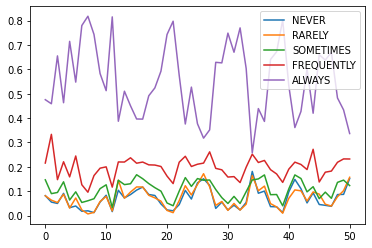

In [159]:
all_states_mean_df.plot.line();#Plotting the means against each other

In [160]:
all_states_only_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [161]:
'''
plotdata = pd.DataFrame(
    all_states_mean_df.columns, 
    index=all_states_only_list)
# Plot a bar chart
plotdata.plot(kind="bar");
'''

'\nplotdata = pd.DataFrame(\n    all_states_mean_df.columns, \n    index=all_states_only_list)\n# Plot a bar chart\nplotdata.plot(kind="bar");\n'

In [162]:
'''
all_states_mean_df = pd.all_states_mean_df(index=all_states_only_list)
all_states_mean_df.plot(kind="bar");
'''

'\nall_states_mean_df = pd.all_states_mean_df(index=all_states_only_list)\nall_states_mean_df.plot(kind="bar");\n'

In [163]:
#CDC set is below, it will be used to obtain the target column of the number of Covid occurences/100K people

In [164]:
# Upload a file to Colab from your computer
#from google.colab import files
#uploaded = files.upload()

In [165]:
corona_predict_url = 'https://raw.githubusercontent.com/jraval/cdc_repository/main/united_states_covid19_cases_and_deaths_by_state.csv'
corona_predict = pd.read_csv(corona_predict_url)

In [166]:
#corona_predict = pd.read_csv(io.BytesIO(uploaded['united_states_covid19_cases_and_deaths_by_state.csv']), header=None, skiprows=3)
                             


In [167]:
print(corona_predict.shape)
#corona_predict.columns = corona_predict.iloc[0]

(61, 13)


In [168]:
corona_predict.iloc[0]

State/Territory                        Alaska
Total Cases                             31834
Confirmed Cases                           NaN
Probable Cases                            NaN
Cases in Last 7 Days                     4165
Case Rate per 100000                     4317
Total Deaths                              121
Confirmed Deaths                          NaN
Probable Deaths                           NaN
Deaths in Last 7 Days                       6
Death Rate per 100000                      16
Case Rate per 100000 in Last 7 Days      80.7
Death Rate per 100K in Last 7 Days        0.1
Name: 0, dtype: object

In [169]:
corona_predict.columns

Index(['State/Territory', 'Total Cases', 'Confirmed Cases', 'Probable Cases',
       'Cases in Last 7 Days', 'Case Rate per 100000', 'Total Deaths',
       'Confirmed Deaths', 'Probable Deaths', 'Deaths in Last 7 Days',
       'Death Rate per 100000', 'Case Rate per 100000 in Last 7 Days',
       'Death Rate per 100K in Last 7 Days'],
      dtype='object')

In [170]:
#corona_predict['State'] = corona_predict['State/Territory']
corona_predict.rename(columns={'State/Territory': 'State'}, inplace=True)

In [171]:
#corona_predict = corona_predict.assign(state = (corona_predict['State']))

In [172]:
corona_predict

,State,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,Case Rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,Case Rate per 100000 in Last 7 Days,Death Rate per 100K in Last 7 Days
0,Alaska,31834,NaN,NaN,4165,4317,121,NaN,NaN,6,16,80.7,0.1
1,Alabama,252900,210037.0,42863.0,16035,5174,3638,3280.0,358.0,166,74,46.9,0.5
2,Arkansas,159309,NaN,NaN,10997,5286,2512,NaN,NaN,107,83,52.1,0.5
3,American Samoa,3,NaN,NaN,0,5,0,NaN,NaN,0,0,0.0,0.0
4,Arizona,337139,326838.0,10301.0,30271,4701,6687,6191.0,496.0,172,93,60.3,0.3
5,California,1225189,NaN,NaN,99490,3097,19211,NaN,NaN,442,48,35.9,0.2
6,Colorado,237310,226954.0,10356.0,30871,4167,3109,2619.0,490.0,249,54,77.4,0.6
7,Connecticut,118754,111025.0,7729.0,11474,3324,5040,4045.0,995.0,159,141,45.9,0.6
8,District of Columbia,21685,NaN,NaN,1276,3087,685,NaN,NaN,12,97,26.0,0.2
9,Delaware,36343,34963.0,1380.0,3679,3758,777,683.0,94.0,20,80,54.3,0.3


In [173]:
corona_predict_no_us = corona_predict.drop([3, 11, 13, 28, 39, 44, 45, 47, 54, 60]) 

In [174]:
corona_predict_no_us = corona_predict_no_us.sort_values(by='State',ascending=True)

In [175]:
corona_predict_no_us.shape

(51, 13)

In [176]:
corona_predict_no_us = corona_predict_no_us.reset_index()
#If you run this code block more than once run the next block, on the first run, ignore the next code block

In [177]:
#Ignore this code block unless you've run the previous code block more than once.



del corona_predict_no_us['index']

In [178]:
#del corona_predict_no_us['level_0']

In [179]:
corona_predict_no_us

,State,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,Case Rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,Case Rate per 100000 in Last 7 Days,Death Rate per 100K in Last 7 Days
0,Alabama,252900,210037.0,42863.0,16035,5174,3638,3280.0,358.0,166,74,46.9,0.5
1,Alaska,31834,NaN,NaN,4165,4317,121,NaN,NaN,6,16,80.7,0.1
2,Arizona,337139,326838.0,10301.0,30271,4701,6687,6191.0,496.0,172,93,60.3,0.3
3,Arkansas,159309,NaN,NaN,10997,5286,2512,NaN,NaN,107,83,52.1,0.5
4,California,1225189,NaN,NaN,99490,3097,19211,NaN,NaN,442,48,35.9,0.2
5,Colorado,237310,226954.0,10356.0,30871,4167,3109,2619.0,490.0,249,54,77.4,0.6
6,Connecticut,118754,111025.0,7729.0,11474,3324,5040,4045.0,995.0,159,141,45.9,0.6
7,Delaware,36343,34963.0,1380.0,3679,3758,777,683.0,94.0,20,80,54.3,0.3
8,District of Columbia,21685,NaN,NaN,1276,3087,685,NaN,NaN,12,97,26.0,0.2
9,Florida,991910,NaN,NaN,53094,4657,18679,NaN,NaN,522,87,35.6,0.4


In [180]:
print(corona_predict_no_us.shape)
corona_predict_no_us['State'].nunique()

(51, 13)


51

In [181]:
len(pd.isnull(corona_predict))
#Null values, boo!

61

In [182]:
pd.isnull(corona_predict_no_us)

,State,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,Case Rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,Case Rate per 100000 in Last 7 Days,Death Rate per 100K in Last 7 Days
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,True,True,False,False,False,False
4,False,False,True,True,False,False,False,True,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,True,True,False,False,False,True,True,False,False,False,False
9,False,False,True,True,False,False,False,True,True,False,False,False,False


In [183]:
all_states_mean_df_target = all_states_mean_df.copy()

In [184]:
all_states_mean_df_target['Death Rate per 100000']= corona_predict_no_us['Death Rate per 100000']

In [185]:
all_states_mean_df_target['Case Rate per 100000']= corona_predict_no_us['Case Rate per 100000']

In [186]:
all_states_mean_df_target

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Death Rate per 100000,Case Rate per 100000
0,Alabama,0.081567,0.081090,0.146612,0.215343,0.475313,74,5174
1,Alaska,0.055138,0.063172,0.089862,0.333103,0.458586,16,4317
2,Arizona,0.049667,0.053200,0.094667,0.147333,0.655000,93,4701
3,Arkansas,0.090920,0.087253,0.138360,0.220627,0.462867,83,5286
4,California,0.032310,0.030724,0.063690,0.158603,0.714638,48,3097
5,Colorado,0.039156,0.071937,0.097266,0.244328,0.547437,54,4167
6,Connecticut,0.017500,0.023000,0.053625,0.126375,0.779500,141,3324
7,Delaware,0.019333,0.006667,0.060667,0.095667,0.817667,80,3758
8,District of Columbia,0.012000,0.013000,0.069000,0.164000,0.743000,97,3087
9,Florida,0.055254,0.057522,0.110343,0.194299,0.582552,87,4657


In [187]:
all_states_mean_df_target.sort_values(by='Case Rate per 100000',ascending=False)#We can eyeball a correlation with death rate/case rate and maske usage, 
#not correlation is not 1:1 but it's significant.  If you look at the Always column, we see a correlation.

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Death Rate per 100000,Case Rate per 100000
34,North Dakota,0.180981,0.164019,0.145925,0.251811,0.257245,127,10543
41,South Dakota,0.148318,0.105061,0.166682,0.219091,0.360939,107,9171
15,Iowa,0.104323,0.117323,0.167424,0.214707,0.396202,77,7333
49,Wisconsin,0.086833,0.102042,0.145361,0.232319,0.433500,62,7162
27,Nebraska,0.123806,0.117710,0.145753,0.261312,0.351452,55,6748
44,Utah,0.093069,0.096966,0.118276,0.271862,0.419759,28,6270
26,Montana,0.150857,0.171589,0.144893,0.215143,0.317536,65,5950
12,Idaho,0.103773,0.144795,0.144773,0.219841,0.386841,54,5889
50,Wyoming,0.151609,0.157000,0.123000,0.232000,0.336435,39,5851
13,Illinois,0.072275,0.071314,0.126873,0.219490,0.510078,103,5799


In [188]:
#corona_predict_no_us = corona_predict.drop([0])

In [189]:
corona_predict_no_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                51 non-null     object 
 1   Total Cases                          51 non-null     int64  
 2   Confirmed Cases                      27 non-null     float64
 3   Probable Cases                       27 non-null     float64
 4   Cases in Last 7 Days                 51 non-null     int64  
 5   Case Rate per 100000                 51 non-null     int64  
 6   Total Deaths                         51 non-null     int64  
 7   Confirmed Deaths                     29 non-null     float64
 8   Probable Deaths                      29 non-null     float64
 9   Deaths in Last 7 Days                51 non-null     int64  
 10  Death Rate per 100000                51 non-null     int64  
 11  Case Rate per 100000 in Last 7 Day

In [190]:
#corona_predict_statesdc = corona_predict[corona_predict.State != 'Federated States of Micronesia'] 
#corona_predict_statesdc = corona_predict[corona_predict.State != 'Federated States of Micronesia']	
#, 'Republic of Marshall Islands', 'American Samoa', 'Northern Mariana Islands', 'Puerto Rico', 'Palau', 'Virgin Islands')

In [191]:
#corona_predict_statesdc = corona_predict_statesdc[~(corona_predict_statesdc.State.isin(['Republic of Marshall Islands', 'American Samoa', 'Guam','Northern Mariana Islands', 'Puerto Rico', 'Palau','United States of America','Virgin Islands']))]

In [192]:
#corona_predict_statesdc

In [193]:
#corona_predict_statesdc.shape, all_states.shape

In [194]:
target = 'Case Rate per 100000'
target
y = all_states_mean_df_target[target]
y

0      5174
1      4317
2      4701
3      5286
4      3097
5      4167
6      3324
7      3758
8      3087
9      4657
10     4529
11     1250
12     5889
13     5799
14     5146
15     7333
16     5408
17     4099
18     5102
19      912
20     3365
21     3348
22     3960
23     5744
24     5252
25     4941
26     5950
27     6748
28     5104
29     1605
30     3838
31     4745
32     3058
33     3538
34    10543
35     3679
36     5224
37     1829
38     2867
39     5477
40     4306
41     9171
42     5616
43     4126
44     6270
45      677
46     2847
47     2219
48     2703
49     7162
50     5851
Name: Case Rate per 100000, dtype: int64

In [195]:
target

'Case Rate per 100000'

In [196]:
pd.set_option("display.precision", 6)
y.value_counts(normalize=True)

3838     0.019608
4126     0.019608
3365     0.019608
4529     0.019608
10543    0.019608
3758     0.019608
2219     0.019608
5799     0.019608
5286     0.019608
677      0.019608
5408     0.019608
2847     0.019608
5146     0.019608
5174     0.019608
3097     0.019608
3348     0.019608
912      0.019608
2703     0.019608
5744     0.019608
4745     0.019608
3087     0.019608
5252     0.019608
4099     0.019608
5889     0.019608
2867     0.019608
5950     0.019608
6270     0.019608
5477     0.019608
3324     0.019608
5102     0.019608
7162     0.019608
3960     0.019608
4306     0.019608
3058     0.019608
5104     0.019608
1250     0.019608
5616     0.019608
5224     0.019608
7333     0.019608
1829     0.019608
3679     0.019608
4701     0.019608
6748     0.019608
5851     0.019608
9171     0.019608
3538     0.019608
4317     0.019608
4941     0.019608
4167     0.019608
1605     0.019608
4657     0.019608
Name: Case Rate per 100000, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



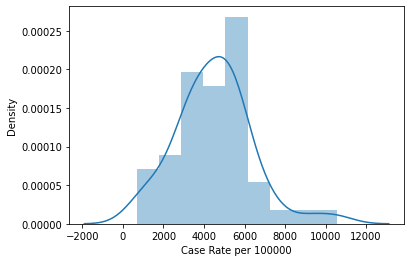

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y);#checking if the target was skewed

In [198]:
target_2 = all_states_mean_df_target['Case Rate per 100000']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



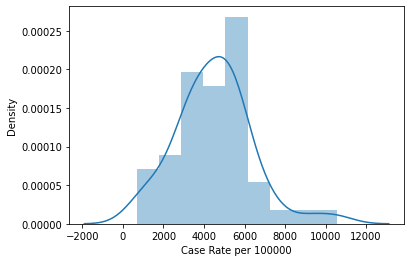

In [199]:
import seaborn as sns#checking if the target was skewed
import matplotlib.pyplot as plt
sns.distplot(target_2);

In [200]:
# Fill missing values, just with a quick hack for now
corona_predict_fill=all_states_mean_df_target.fillna('Missing')
corona_predict_fill

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Death Rate per 100000,Case Rate per 100000
0,Alabama,0.081567,0.081090,0.146612,0.215343,0.475313,74,5174
1,Alaska,0.055138,0.063172,0.089862,0.333103,0.458586,16,4317
2,Arizona,0.049667,0.053200,0.094667,0.147333,0.655000,93,4701
3,Arkansas,0.090920,0.087253,0.138360,0.220627,0.462867,83,5286
4,California,0.032310,0.030724,0.063690,0.158603,0.714638,48,3097
5,Colorado,0.039156,0.071937,0.097266,0.244328,0.547437,54,4167
6,Connecticut,0.017500,0.023000,0.053625,0.126375,0.779500,141,3324
7,Delaware,0.019333,0.006667,0.060667,0.095667,0.817667,80,3758
8,District of Columbia,0.012000,0.013000,0.069000,0.164000,0.743000,97,3087
9,Florida,0.055254,0.057522,0.110343,0.194299,0.582552,87,4657


In [201]:
corona_predict_fill.dropna()

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Death Rate per 100000,Case Rate per 100000
0,Alabama,0.081567,0.081090,0.146612,0.215343,0.475313,74,5174
1,Alaska,0.055138,0.063172,0.089862,0.333103,0.458586,16,4317
2,Arizona,0.049667,0.053200,0.094667,0.147333,0.655000,93,4701
3,Arkansas,0.090920,0.087253,0.138360,0.220627,0.462867,83,5286
4,California,0.032310,0.030724,0.063690,0.158603,0.714638,48,3097
5,Colorado,0.039156,0.071937,0.097266,0.244328,0.547437,54,4167
6,Connecticut,0.017500,0.023000,0.053625,0.126375,0.779500,141,3324
7,Delaware,0.019333,0.006667,0.060667,0.095667,0.817667,80,3758
8,District of Columbia,0.012000,0.013000,0.069000,0.164000,0.743000,97,3087
9,Florida,0.055254,0.057522,0.110343,0.194299,0.582552,87,4657


In [202]:
target

'Case Rate per 100000'

In [203]:
corona_predict_fill.value_counts()

STATES                NEVER     RARELY    SOMETIMES  FREQUENTLY  ALWAYS    Death Rate per 100000  Case Rate per 100000
Wyoming               0.151609  0.157000  0.123000   0.232000    0.336435  39                     5851                    1
Idaho                 0.103773  0.144795  0.144773   0.219841    0.386841  54                     5889                    1
Michigan              0.044795  0.061265  0.100289   0.218880    0.574807  97                     3960                    1
Massachusetts         0.019500  0.011786  0.040143   0.131143    0.797286  155                    3348                    1
Maryland              0.022917  0.020917  0.051542   0.161833    0.742750  78                     3365                    1
Maine                 0.047500  0.058938  0.100062   0.201250    0.592375  16                     912                     1
Louisiana             0.082328  0.072453  0.114406   0.207156    0.523656  138                    5102                    1
Kentucky     

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
target_2

0      5174
1      4317
2      4701
3      5286
4      3097
5      4167
6      3324
7      3758
8      3087
9      4657
10     4529
11     1250
12     5889
13     5799
14     5146
15     7333
16     5408
17     4099
18     5102
19      912
20     3365
21     3348
22     3960
23     5744
24     5252
25     4941
26     5950
27     6748
28     5104
29     1605
30     3838
31     4745
32     3058
33     3538
34    10543
35     3679
36     5224
37     1829
38     2867
39     5477
40     4306
41     9171
42     5616
43     4126
44     6270
45      677
46     2847
47     2219
48     2703
49     7162
50     5851
Name: Case Rate per 100000, dtype: int64

In [206]:
corona_predict_fill

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Death Rate per 100000,Case Rate per 100000
0,Alabama,0.081567,0.081090,0.146612,0.215343,0.475313,74,5174
1,Alaska,0.055138,0.063172,0.089862,0.333103,0.458586,16,4317
2,Arizona,0.049667,0.053200,0.094667,0.147333,0.655000,93,4701
3,Arkansas,0.090920,0.087253,0.138360,0.220627,0.462867,83,5286
4,California,0.032310,0.030724,0.063690,0.158603,0.714638,48,3097
5,Colorado,0.039156,0.071937,0.097266,0.244328,0.547437,54,4167
6,Connecticut,0.017500,0.023000,0.053625,0.126375,0.779500,141,3324
7,Delaware,0.019333,0.006667,0.060667,0.095667,0.817667,80,3758
8,District of Columbia,0.012000,0.013000,0.069000,0.164000,0.743000,97,3087
9,Florida,0.055254,0.057522,0.110343,0.194299,0.582552,87,4657


In [207]:
#corona_predict_fill['Death Rate per 100000'] = corona_predict_fill['Death Rate per 100000']/100000
#df = df.assign(Percentage = lambda x: (x['Total_Marks'] /500 * 100))

In [208]:
corona_predict_fill

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Death Rate per 100000,Case Rate per 100000
0,Alabama,0.081567,0.081090,0.146612,0.215343,0.475313,74,5174
1,Alaska,0.055138,0.063172,0.089862,0.333103,0.458586,16,4317
2,Arizona,0.049667,0.053200,0.094667,0.147333,0.655000,93,4701
3,Arkansas,0.090920,0.087253,0.138360,0.220627,0.462867,83,5286
4,California,0.032310,0.030724,0.063690,0.158603,0.714638,48,3097
5,Colorado,0.039156,0.071937,0.097266,0.244328,0.547437,54,4167
6,Connecticut,0.017500,0.023000,0.053625,0.126375,0.779500,141,3324
7,Delaware,0.019333,0.006667,0.060667,0.095667,0.817667,80,3758
8,District of Columbia,0.012000,0.013000,0.069000,0.164000,0.743000,97,3087
9,Florida,0.055254,0.057522,0.110343,0.194299,0.582552,87,4657


In [209]:
'''
# set the filepath and load in a shapefile
fp = “datasets/geo-data/gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp”
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()
'''

'\n# set the filepath and load in a shapefile\nfp = “datasets/geo-data/gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp”\nmap_df = gpd.read_file(fp)\n# check data type so we can see that this is not a normal dataframe, but a GEOdataframe\nmap_df.head()\n'

In [210]:
'''
# set a variable that will call whatever column we want to visualise on the map
case_rate = 'Case Rate per 100000'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
'''

"\n# set a variable that will call whatever column we want to visualise on the map\ncase_rate = 'Case Rate per 100000'\n# set the range for the choropleth\nvmin, vmax = 120, 220\n# create figure and axes for Matplotlib\nfig, ax = plt.subplots(1, figsize=(10, 6))\n"

In [211]:
X = all_states_mean_df_target.drop(columns=['Case Rate per 100000'])
#df.drop(columns=['B', 'C'])#dropped target

In [212]:
X#Dataframe without target

,STATES,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Death Rate per 100000
0,Alabama,0.081567,0.081090,0.146612,0.215343,0.475313,74
1,Alaska,0.055138,0.063172,0.089862,0.333103,0.458586,16
2,Arizona,0.049667,0.053200,0.094667,0.147333,0.655000,93
3,Arkansas,0.090920,0.087253,0.138360,0.220627,0.462867,83
4,California,0.032310,0.030724,0.063690,0.158603,0.714638,48
5,Colorado,0.039156,0.071937,0.097266,0.244328,0.547437,54
6,Connecticut,0.017500,0.023000,0.053625,0.126375,0.779500,141
7,Delaware,0.019333,0.006667,0.060667,0.095667,0.817667,80
8,District of Columbia,0.012000,0.013000,0.069000,0.164000,0.743000,97
9,Florida,0.055254,0.057522,0.110343,0.194299,0.582552,87


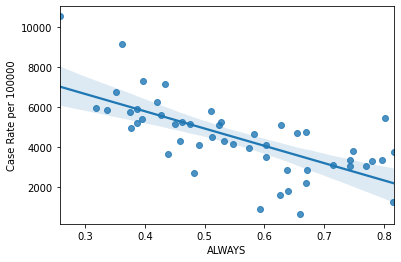

In [213]:
# Import seaborn and matplotlib with the standard aliases
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example penguins dataset
#penguins = sns.load_dataset("penguins")

# Create a "regplot"
sns.regplot(x="ALWAYS", y="Case Rate per 100000", data=corona_predict_fill, fit_reg=True)

plt.show()
#plt.clf()

#As the mask usage goes up, the rate of coronavirus per 100000 people goes up 

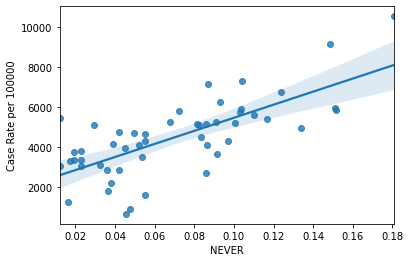

In [214]:
# Import seaborn and matplotlib with the standard aliases
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example penguins dataset
#penguins = sns.load_dataset("penguins")

# Create a "regplot"
sns.regplot(x="NEVER", y="Case Rate per 100000", data=corona_predict_fill, fit_reg=True)

plt.show()
#plt.clf()

#As mask usage goes down the rate of coronavirus cases per 100000 goes up

(7.0, 0.0)

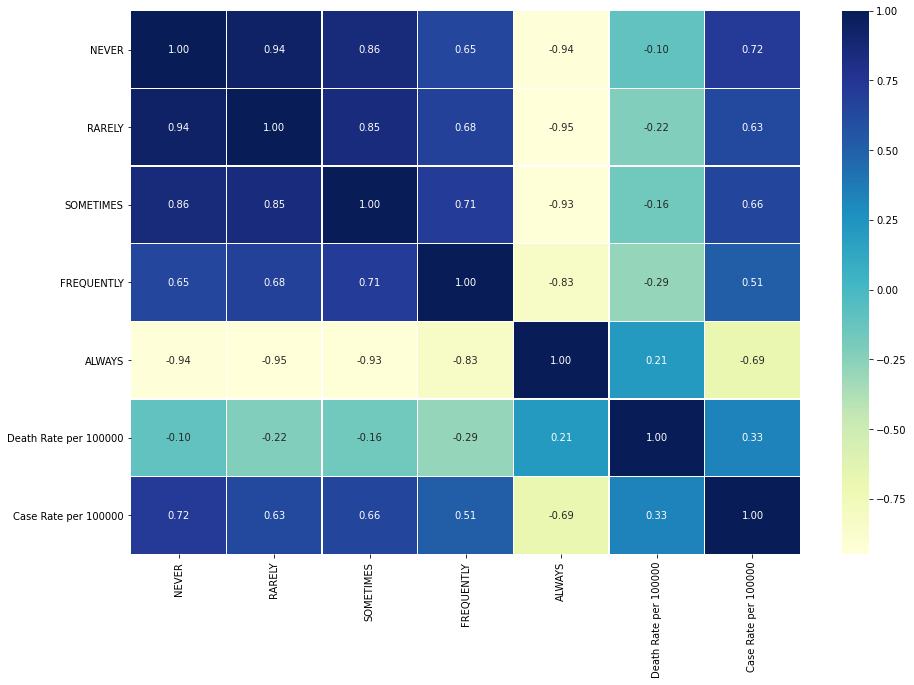

In [215]:
# Let's make our correlation matrix a little prettier
corr_matrix = corona_predict_fill.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

(7.0, 0.0)

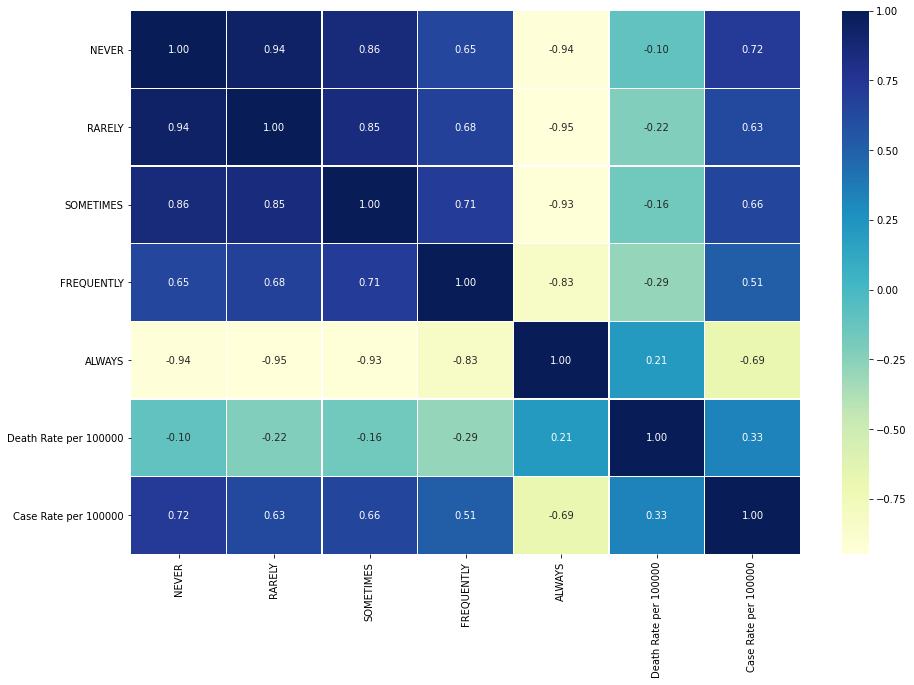

In [216]:
corr_matrix = all_states_mean_df_target.corr()#Copy of the above dataframe, determining if there's a difference, the above was wrangled.
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

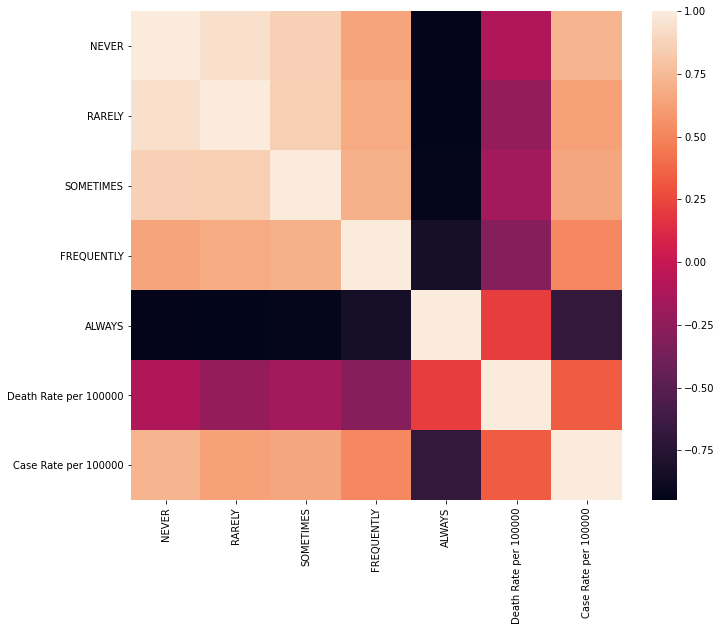

In [217]:
# Let's get a sense for which columns correlate, another visualization
import seaborn as sms
import matplotlib.pyplot as plt

plt.figure(figsize=(11,9))
sms.heatmap(corona_predict_fill.corr());

In [218]:
# Import pandas and seaborn
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data into a DataFrame


# Drop NaNs
#penguins.dropna(inplace=True)

# Create the 2-D features matrix
#X_penguins = penguins['flipper_length_mm']
#X_penguins_2D = X_penguins[:, np.newaxis]

# Create the target array
#y_penguins = penguins['body_mass_g']

In [219]:
X = X.drop(columns='STATES')

In [220]:
# Import the train_test_split utility
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print('The training and testing feature: ', X_train.shape, y_train.shape)
print('The training and testing target: ', X_test.shape, y_test.shape)

The training and testing feature:  (40, 6) (40,)
The training and testing target:  (11, 6) (11,)


In [221]:
from sklearn.linear_model import LinearRegression#Import predictor class

In [222]:
model = LinearRegression()#Instantiate class

In [223]:
#show model parameters
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [225]:
# Display the shape of X_penguins
print('Original features matrix: ', X.shape)

# Add a new axis to create a column vector - Did not do, was causing problems
#X_2D = X[:, np.newaxis]
#print(X_2D.shape)

Original features matrix:  (51, 6)


In [226]:
y

0      5174
1      4317
2      4701
3      5286
4      3097
5      4167
6      3324
7      3758
8      3087
9      4657
10     4529
11     1250
12     5889
13     5799
14     5146
15     7333
16     5408
17     4099
18     5102
19      912
20     3365
21     3348
22     3960
23     5744
24     5252
25     4941
26     5950
27     6748
28     5104
29     1605
30     3838
31     4745
32     3058
33     3538
34    10543
35     3679
36     5224
37     1829
38     2867
39     5477
40     4306
41     9171
42     5616
43     4126
44     6270
45      677
46     2847
47     2219
48     2703
49     7162
50     5851
Name: Case Rate per 100000, dtype: int64

In [227]:


for column in X.columns:
    if X[column].dtype == type(object):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

In [228]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
# Slope (also called the model coefficient)
print(model.coef_)

[-4.91973720e+05 -5.33898761e+05 -5.16729007e+05 -5.11074274e+05
 -5.23246363e+05  2.68742272e+01]


In [230]:
# Intercept
print(model.intercept_)

521315.34169787524


In [231]:
#Get the mean baseline
print('Mean Baseline (using 0 features)')
guess = y_train.mean()
guess

Mean Baseline (using 0 features)


4488.825

In [233]:
# Train Error
from sklearn.metrics import mean_absolute_error
y_pred = [guess]*len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae: .2f}  error')

Train Error:  1579.28  error


In [232]:
y_test.shape

(11,)

In [234]:
X_test.shape

(11, 6)

In [235]:
y_train.shape

(40,)

In [236]:
y_test

43    4126
40    4306
46    2847
12    5889
24    5252
31    4745
17    4099
32    3058
3     5286
30    3838
13    5799
Name: Case Rate per 100000, dtype: int64

In [237]:
y_train.shape

(40,)

In [238]:
X_test.shape

(11, 6)

In [239]:
# Test Error
y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (Coronavirus Case Rate): {mae:.2f}%')

Test Error (Coronavirus Case Rate): 835.08%


In [241]:
# Calculate the accuracy score #Dataset is too small, regression does not/did not work.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.00015186073544160017

In [248]:
 #These are continuous variables, classification should not work, plus there's no Ordinal Encoder
 #Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [245]:
#Tried classification model anyway, it did not work
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'KNN': 0.0, 'Logistic Regression': 0.0, 'Random Forest': 0.0}

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
X_train

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Death Rate per 100000
8,0.012000,0.013000,0.069000,0.164000,0.743000,97
49,0.086833,0.102042,0.145361,0.232319,0.433500,62
6,0.017500,0.023000,0.053625,0.126375,0.779500,141
47,0.037897,0.038872,0.070667,0.182410,0.669872,37
4,0.032310,0.030724,0.063690,0.158603,0.714638,48
36,0.100364,0.120792,0.166636,0.226065,0.386104,44
33,0.053780,0.046560,0.098030,0.198320,0.603310,50
19,0.047500,0.058938,0.100062,0.201250,0.592375,16
48,0.086073,0.077073,0.136055,0.218436,0.482418,41
15,0.104323,0.117323,0.167424,0.214707,0.396202,77
